<a href="https://colab.research.google.com/github/enjuguna/Tweet-Sentimental-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentimental Analysis
This is a sentimental analysis that checks for the tweets fetched from Twitter using Python
This program analyzes tweets as positive or negative

I had previously chosen to use API keys but it had a limit of 100 per call. So I had to implement a loop to import more tweets but then the API reached its limit of calling 50,000 tweets per month.

Thus, I chose to download tweets in csv format. 

##1. Importing the Libraries

In [ ]:
import string
import tweepy 
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
plt.style.use('fivethirtyeight')

from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer


###2. Upload the CSV file




In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()
file = pd.read_csv('kenyapwr.csv')


Saving kenyapwr.csv to kenyapwr (1).csv


##3. Choice of Entity
I chose this company as it may be having a variation of tweets from positive news like power connections to negative news such as blackouts, illegal connections and token messages being delayed.

For this I'll show the 5 top rows.

In [ ]:
file.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16
0,1.377910e+18,@Druid254 @CharleeOddie1 @KenyaPower_Care Same...,MUHAMMAD ONYANGO®,Moha001_Onyango,2021-04-02T08:57:47.000Z,Fri Apr 02 08:57:47 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0,3,photo,https://pbs.twimg.com/media/Ex9QHemXAAE7Cy9.jpg,NaN
1,1.377910e+18,@KenyaPower_Care How about vast areas that hav...,Chris Rhodes,cmr600,2021-04-02T08:57:18.000Z,Fri Apr 02 08:57:18 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0,1,NaN,NaN,NaN
2,1.377910e+18,@CharleeOddie1 @Moha001_Onyango @KenyaPower_Ca...,𝖙𝖍𝖊 𝕰𝖙𝖍𝖎𝖈𝖎𝖘𝖙,Druid254,2021-04-02T08:57:08.000Z,Fri Apr 02 08:57:08 +0000 2021,1,0,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,3,NaN,NaN,NaN
3,1.377910e+18,"@KenyaPower_Care Hi EM, What is the ETA for re...",Kennedy Ngarari,Kenny_Cman,2021-04-02T08:56:45.000Z,Fri Apr 02 08:56:45 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,0,1,NaN,NaN,NaN
4,1.377910e+18,@KenyaPower_Care Hi. I am trying to buy tokens...,Daniel Courier,courierdan,2021-04-02T08:56:44.000Z,Fri Apr 02 08:56:44 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,0,1,NaN,NaN,NaN


###3. Counting the number of rows and columns



In [ ]:
file.shape

(2080, 17)

##4. Creating a Dataframe: 
I'll create a dataframe with the columns that are needed:





In [ ]:
#The dataframe
tweets_df = file[["Tweet Id", "Screen Name", "Text"]]

#Print the first five columns
tweets_df.head()

,Tweet Id,Screen Name,Text
0,1.377910e+18,Moha001_Onyango,@Druid254 @CharleeOddie1 @KenyaPower_Care Same...
1,1.377910e+18,cmr600,@KenyaPower_Care How about vast areas that hav...
2,1.377910e+18,Druid254,@CharleeOddie1 @Moha001_Onyango @KenyaPower_Ca...
3,1.377910e+18,Kenny_Cman,"@KenyaPower_Care Hi EM, What is the ETA for re..."
4,1.377910e+18,courierdan,@KenyaPower_Care Hi. I am trying to buy tokens...


In [ ]:
# Number of columns in the new dataframe
tweets_df.shape

(2080, 3)

##5. Cleaning the Data

####A. Tokenizing the tweets

Splitting the strings into individual words:


The Data is a bit dirty because it contains hyperlinks, RTs symbols and hashtags:

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pip install emoji

In [ ]:
import emoji
def tokenize_tweets(text):
  #remove emojis
  text = emoji.demojize(text)
  #remove urls
  text = re.sub('http[s]?://\S+', '', text)
  #remove punctuations
  text = re.sub(r'[^\w\s]','',text)
  #strip numbers
  text = re.sub('[0-9]+', '', text)
  text = word_tokenize(text)
  
  return text
tweets_df["Tweets"] = tweets_df["Text"].apply(lambda x: tokenize_tweets(x))
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english")
tweets_df["stop_words"] = tweets_df["Tweets"].apply(lambda x: [w for w in x if w in stop])
tweets_df["Tweets"] = tweets_df["Tweets"].apply(lambda x: [w.lower() for w in x if w not in stop])

#Display the first five rows
tweets_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Tweet Id,Screen Name,Text,Tweets,stop_words
0,1.377910e+18,Moha001_Onyango,@Druid254 @CharleeOddie1 @KenyaPower_Care Same...,"[druid, charleeoddie, kenyapower_care, same, p...",[here]
1,1.377910e+18,cmr600,@KenyaPower_Care How about vast areas that hav...,"[kenyapower_care, how, vast, areas, without, p...","[about, that, have, been, now, for, over, of, ..."
2,1.377910e+18,Druid254,@CharleeOddie1 @Moha001_Onyango @KenyaPower_Ca...,"[charleeoddie, moha_onyango, kenyapower_care, ...","[is, not]"
3,1.377910e+18,Kenny_Cman,"@KenyaPower_Care Hi EM, What is the ETA for re...","[kenyapower_care, hi, em, what, eta, resolution]","[is, the, for]"
4,1.377910e+18,courierdan,@KenyaPower_Care Hi. I am trying to buy tokens...,"[kenyapower_care, hi, i, trying, buy, tokens, ...","[am, to, in]"


###B. Stemming the tweets
Converting the words into general form



In [ ]:
string.punctuation
from nltk.stem.porter import *
stemmer = PorterStemmer()
tweets_df["Tweets"] = tweets_df["Tweets"].apply(lambda x: [stemmer.stem(w) for w in x])
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Tweet Id,Screen Name,Text,Tweets,stop_words
0,1.377910e+18,Moha001_Onyango,@Druid254 @CharleeOddie1 @KenyaPower_Care Same...,"[druid, charleeoddi, kenyapower_car, same, pro...",[here]
1,1.377910e+18,cmr600,@KenyaPower_Care How about vast areas that hav...,"[kenyapower_car, how, vast, area, without, pow...","[about, that, have, been, now, for, over, of, ..."
2,1.377910e+18,Druid254,@CharleeOddie1 @Moha001_Onyango @KenyaPower_Ca...,"[charleeoddi, moha_onyango, kenyapower_car, th...","[is, not]"
3,1.377910e+18,Kenny_Cman,"@KenyaPower_Care Hi EM, What is the ETA for re...","[kenyapower_car, hi, em, what, eta, resolut]","[is, the, for]"
4,1.377910e+18,courierdan,@KenyaPower_Care Hi. I am trying to buy tokens...,"[kenyapower_car, hi, i, tri, buy, token, vain,...","[am, to, in]"


####C. Remove punctuations




In [ ]:
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  
  
  return text
tweets_df['tweet_punct'] = tweets_df['Tweets'].apply(lambda x: remove_punct(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
tweets_df.head

<bound method NDFrame.head of           Tweet Id  ...                                        tweet_punct
0     1.377910e+18  ...      druid charleeoddi kenyapower_car same problem
1     1.377910e+18  ...  kenyapower_car how vast area without power two...
2     1.377910e+18  ...   charleeoddi moha_onyango kenyapower_car thi work
3     1.377910e+18  ...              kenyapower_car hi em what eta resolut
4     1.377910e+18  ...  kenyapower_car hi i tri buy token vain kindli ...
...            ...  ...                                                ...
2075  1.377660e+18  ...  kenyapower_car i think pm imefika ama time zon...
2076  1.377660e+18  ...  chebetlyndah hi your ref number technician add...
2077  1.377660e+18  ...  kenyapower_car hi we dont power sinc yesterday...
2078  1.377660e+18  ...  kenyapower_car power outag kariobangi south ne...
2079  1.377660e+18  ...  kenyapower_car dear kplc how long take whole v...

[2080 rows x 6 columns]>

##7. Understanding the Sentiments
Next thing is to understand how the sentiments are distributed. 
I will visualize this using a wordcloud.

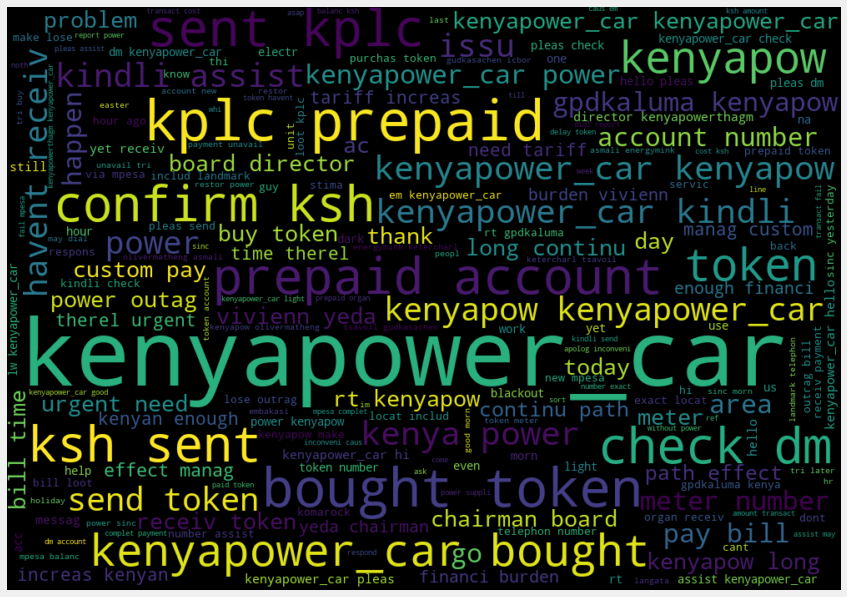

In [ ]:
#wordcloud visualization
all_words = ' '.join([text for text in tweets_df['tweet_punct']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#####Getting the 10 most common words:

In [ ]:


cnt = Counter()
for text in tweets_df["tweet_punct"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('kenyapower_car', 1557),
 ('token', 729),
 ('kenyapow', 527),
 ('power', 474),
 ('i', 381),
 ('number', 286),
 ('pleas', 273),
 ('kindli', 254),
 ('kplc', 235),
 ('receiv', 232)]

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

###8. Sentiments Label




In [ ]:
def sentiment_score_compound(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

def sentiment_score_pos(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['pos']

def sentiment_score_neg(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neg']

def sentiment_score_neu(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neu']
tweets_df["tweets_sent_compound"] = tweets_df["tweet_punct"].apply(lambda x: sentiment_score_compound(x))
tweets_df["tweets_sent_pos"] = tweets_df["tweet_punct"].apply(lambda x: sentiment_score_pos(x))
tweets_df["tweets_sent_neg"] = tweets_df["tweet_punct"].apply(lambda x: sentiment_score_neg(x))
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Tweet Id,Screen Name,Text,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg
0,1.377910e+18,Moha001_Onyango,@Druid254 @CharleeOddie1 @KenyaPower_Care Same...,"[druid, charleeoddi, kenyapower_car, same, pro...",[here],druid charleeoddi kenyapower_car same problem,-0.4019,0.0,0.403
1,1.377910e+18,cmr600,@KenyaPower_Care How about vast areas that hav...,"[kenyapower_car, how, vast, area, without, pow...","[about, that, have, been, now, for, over, of, ...",kenyapower_car how vast area without power two...,0.0000,0.0,0.000
2,1.377910e+18,Druid254,@CharleeOddie1 @Moha001_Onyango @KenyaPower_Ca...,"[charleeoddi, moha_onyango, kenyapower_car, th...","[is, not]",charleeoddi moha_onyango kenyapower_car thi work,0.0000,0.0,0.000
3,1.377910e+18,Kenny_Cman,"@KenyaPower_Care Hi EM, What is the ETA for re...","[kenyapower_car, hi, em, what, eta, resolut]","[is, the, for]",kenyapower_car hi em what eta resolut,0.0000,0.0,0.000
4,1.377910e+18,courierdan,@KenyaPower_Care Hi. I am trying to buy tokens...,"[kenyapower_car, hi, i, tri, buy, token, vain,...","[am, to, in]",kenyapower_car hi i tri buy token vain kindli ...,-0.4215,0.0,0.259


##9. Vectorization



In [41]:
wordlist = nltk.FreqDist(all_words)
word_features = wordlist.keys()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_list = []
for tweet in tweets_df["tweet_punct"]:
  
  tweets_list.append(tweet)
len(tweets_list)
tweets_df.shape

X = tweets_df["tweet_punct"]

vec = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf = True,use_idf = True,ngram_range=(1, 2))

In [42]:
len(all_words)


167706

##10. Tweet labelling

If the value of the tweet is less than 0, this results in a negative label.
Thus a positive label is 1



In [43]:
def label_value(val):
  if val < 0:
    return 0
  else:
    return 1
tweets_df["label"] = tweets_df["tweets_sent_compound"].apply(lambda x: label_value(x))
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweet Id,Screen Name,Text,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg,label
0,1.377910e+18,Moha001_Onyango,@Druid254 @CharleeOddie1 @KenyaPower_Care Same...,"[druid, charleeoddi, kenyapower_car, same, pro...",[here],druid charleeoddi kenyapower_car same problem,-0.4019,0.0,0.403,0
1,1.377910e+18,cmr600,@KenyaPower_Care How about vast areas that hav...,"[kenyapower_car, how, vast, area, without, pow...","[about, that, have, been, now, for, over, of, ...",kenyapower_car how vast area without power two...,0.0000,0.0,0.000,1
2,1.377910e+18,Druid254,@CharleeOddie1 @Moha001_Onyango @KenyaPower_Ca...,"[charleeoddi, moha_onyango, kenyapower_car, th...","[is, not]",charleeoddi moha_onyango kenyapower_car thi work,0.0000,0.0,0.000,1
3,1.377910e+18,Kenny_Cman,"@KenyaPower_Care Hi EM, What is the ETA for re...","[kenyapower_car, hi, em, what, eta, resolut]","[is, the, for]",kenyapower_car hi em what eta resolut,0.0000,0.0,0.000,1
4,1.377910e+18,courierdan,@KenyaPower_Care Hi. I am trying to buy tokens...,"[kenyapower_car, hi, i, tri, buy, token, vain,...","[am, to, in]",kenyapower_car hi i tri buy token vain kindli ...,-0.4215,0.0,0.259,0


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(tweets_list)
X = cv.transform(tweets_list)
y = tweets_df["label"].values

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.2, random_state = 0
)

##8. Using Machine Learning Algorithms

Now that we understand what the main words revolve around: We will be testing various algorithms and compare their performance (i.e. Accuracy, precision, and recall) in sentiment analysis.

These are: 
- Naïve Bayes
- Support Vector Machine
- Logistic Regression


###A. Naïve Bayes


In [47]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8221153846153846
              precision    recall  f1-score   support

           0       0.71      0.37      0.49       381
           1       0.84      0.96      0.89      1283

    accuracy                           0.82      1664
   macro avg       0.78      0.66      0.69      1664
weighted avg       0.81      0.82      0.80      1664

[[ 142  239]
 [  57 1226]]


**The Accuracy is 82%**

###B. Support Vector Machine


In [48]:
from sklearn.svm import LinearSVC
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(tweets_list)
X = ngram_vectorizer.transform(tweets_list)
y = tweets_df["label"].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.2, random_state = 0
)
svm = LinearSVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8792067307692307
              precision    recall  f1-score   support

           0       0.95      0.50      0.66       381
           1       0.87      0.99      0.93      1283

    accuracy                           0.88      1664
   macro avg       0.91      0.75      0.79      1664
weighted avg       0.89      0.88      0.86      1664

[[ 191  190]
 [  11 1272]]


**The Accuracy is 88%**

####C. Logistic Regression


In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8641826923076923
              precision    recall  f1-score   support

           0       0.95      0.43      0.59       381
           1       0.85      0.99      0.92      1283

    accuracy                           0.86      1664
   macro avg       0.90      0.71      0.75      1664
weighted avg       0.88      0.86      0.84      1664

[[ 163  218]
 [   8 1275]]


**The accuracy is 86%**

##9. Grapical Analysis

Graphical distribution of positive and negative tweets.
(From Part 10)

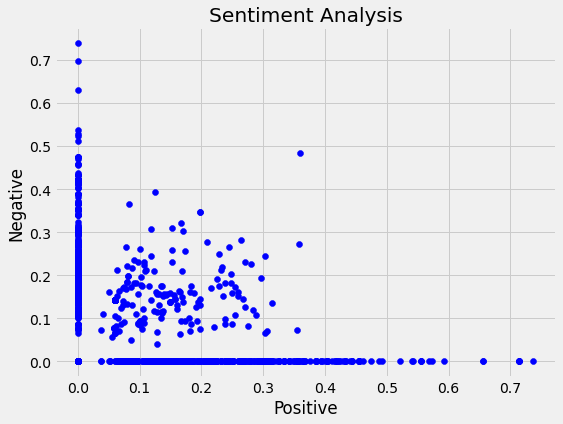

In [52]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, tweets_df.shape[0]):
  plt.scatter(tweets_df["tweets_sent_pos"][i], tweets_df["tweets_sent_neg"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Positive') 
plt.ylabel('Negative') 
plt.show()